# October 21 - r/leafs Fantasy Hockey Standings Analysis

In [1]:
# importing the standard data analysis tools for working with & visualzing data in python
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord,"aesthetics")))
%matplotlib inline

In [2]:
# I haven't automated the data scraping yet, just downloaded the table into excel from Yahoo
df = pd.read_csv('data-files/2017-10-21.csv')

In [3]:
# Renaming the columns for clarity
df.rename(columns={'GP*.1': 'GoalieGP', 'GP*': 'PlayerGP'}, inplace=True)
df_corr = df.corr()
df_corr.loc[['GAA'],['Rank']] = df_corr.loc[['GAA'],['Rank']]*-1
df_corr.sort_values('Rank', ascending=False)

,Rank,Actual Rank,PlayerGP,G,A,+/-,PIM,PPP,SHP,SOG,FW,HIT,BLK,GoalieGP,W,GAA,SA,SV%,SHO
Rank,1.000000,-1.000000,0.358117,0.218825,0.349660,0.300375,0.011830,0.236790,0.493621,0.338686,0.377384,0.318022,0.171965,0.746934,0.740543,-0.641500,0.736944,0.714091,0.660747
GoalieGP,0.746934,-0.746934,0.449259,0.454696,-0.107556,0.267404,-0.023853,-0.032703,0.285635,0.464374,0.122087,0.427883,0.353722,1.000000,0.758898,-0.318109,0.955722,0.459818,0.581586
W,0.740543,-0.740543,0.352895,0.161548,-0.047319,0.174878,-0.185053,-0.121221,0.143915,0.346616,0.400571,0.181455,0.335522,0.758898,1.000000,-0.506117,0.806397,0.629453,0.602389
SA,0.736944,-0.736944,0.345183,0.371128,-0.138458,0.230241,-0.098722,-0.073962,0.287555,0.440671,0.195310,0.381779,0.302368,0.955722,0.806397,-0.267082,1.000000,0.452578,0.594994
SV%,0.714091,-0.714091,0.120268,-0.080772,0.324829,0.102280,-0.231940,0.171866,-0.020053,0.028541,0.377102,0.091942,0.315166,0.459818,0.629453,-0.935714,0.452578,1.000000,0.563326
SHO,0.660747,-0.660747,0.023007,0.301897,-0.046320,0.278073,-0.267522,0.285488,0.175199,-0.113985,0.363711,0.081945,0.041439,0.581586,0.602389,-0.456312,0.594994,0.563326,1.000000
GAA,0.641500,0.641500,-0.147660,0.009195,-0.396176,-0.038324,0.218991,-0.240773,0.028177,-0.042907,-0.303882,-0.061646,-0.242143,-0.318109,-0.506117,1.000000,-0.267082,-0.935714,-0.456312
SHP,0.493621,-0.493621,0.230594,0.557633,0.174846,0.526611,-0.105326,-0.030893,1.000000,0.132731,0.202600,-0.060627,-0.244634,0.285635,0.143915,0.028177,0.287555,-0.020053,0.175199
FW,0.377384,-0.377384,-0.268084,-0.029976,-0.095456,0.123500,-0.179257,-0.100963,0.202600,-0.421210,1.000000,-0.096708,-0.076484,0.122087,0.400571,-0.303882,0.195310,0.377102,0.363711
PlayerGP,0.358117,-0.358117,1.000000,0.131062,0.286779,-0.122720,-0.017864,0.130241,0.230594,0.768691,-0.268084,0.264507,0.296586,0.449259,0.352895,-0.147660,0.345183,0.120268,0.023007


In [4]:
# Seperated Player vs. Goalie data
df_players = df[['Rank', 'Team Name', 'PlayerGP', 'G', 'A', '+/-', 'PIM', 'PPP', 'SHP', 'SOG', 'FW', 'HIT', 'BLK']]
df_goalies = df[['Rank', 'Team Name', 'GoalieGP', 'W', 'GAA', 'SA', 'SV%', 'SHO']]

In [5]:
df_goalies.describe()

,Rank,GoalieGP,W,GAA,SA,SV%,SHO
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,10.650000,9.900000,5.000000,2.860000,294.700000,0.910500,0.65000
std,6.002412,2.468752,2.865402,0.629302,87.808464,0.017479,0.67082
min,1.000000,5.000000,1.000000,1.830000,128.000000,0.870000,0.00000
25%,6.000000,8.000000,3.000000,2.462500,241.750000,0.898750,0.00000
50%,10.500000,10.000000,4.500000,2.905000,281.500000,0.911500,1.00000
75%,15.500000,12.000000,6.500000,3.117500,349.750000,0.923250,1.00000
max,20.000000,15.000000,11.000000,4.680000,501.000000,0.944000,2.00000


In [6]:
#df_goalies.median()

In [7]:
df_goalies_sorted_bySA = df_goalies.sort_values('SA', ascending=False)
df_goalies_sorted_byGP = df_goalies.sort_values('GoalieGP', ascending=False)
df_goalies_sorted_bySVP = df_goalies.sort_values('SV%', ascending=False)
df_goalies_sorted_byGAA = df_goalies.sort_values('GAA', ascending=False)
df_goalies_sorted_byW = df_goalies.sort_values('W', ascending=False)


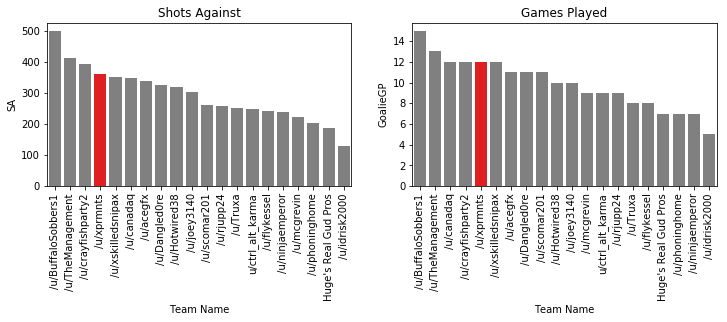

In [8]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_bySA['Team Name']]
sns.barplot(x='Team Name', y='SA', data=df_goalies_sorted_bySA, palette=clrs, ax=ax1)
ax1.set_title('Shots Against')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    
clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_byGP['Team Name']]
sns.barplot(x='Team Name', y='GoalieGP', data=df_goalies_sorted_byGP, palette=clrs2, ax=ax2)
ax2.set_title('Games Played')
for item in ax2.get_xticklabels():
    item.set_rotation(90)


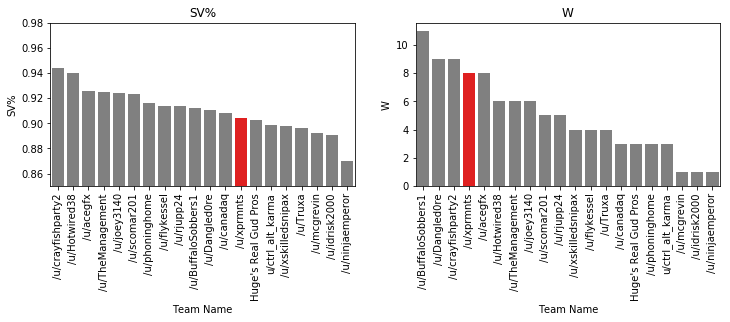

In [9]:
fig,(ax3,ax4) = plt.subplots(ncols=2, figsize=(12,3))
clrs3 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_bySVP['Team Name']]
sns.barplot(x='Team Name', y='SV%', data=df_goalies_sorted_bySVP, palette=clrs3, ax=ax3)
for item in ax3.get_xticklabels():
    item.set_rotation(90)
ax3.set_title('SV%')
ax3.set_ylim([.85,.98])

clrs4 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_byW['Team Name']]
sns.barplot(x='Team Name', y='W', data=df_goalies_sorted_byW, palette=clrs4, ax=ax4)
for item in ax4.get_xticklabels():
    item.set_rotation(90)
ax4.set_title('W')

In [10]:
# Examining the correlation in statistics for goalies
df_goalies_corr = df_goalies.corr()
df_goalies_corr.sort_values('Rank', ascending=False)

,Rank,GoalieGP,W,GAA,SA,SV%,SHO
Rank,1.000000,0.746934,0.740543,-0.641500,0.736944,0.714091,0.660747
GoalieGP,0.746934,1.000000,0.758898,-0.318109,0.955722,0.459818,0.581586
W,0.740543,0.758898,1.000000,-0.506117,0.806397,0.629453,0.602389
SA,0.736944,0.955722,0.806397,-0.267082,1.000000,0.452578,0.594994
SV%,0.714091,0.459818,0.629453,-0.935714,0.452578,1.000000,0.563326
SHO,0.660747,0.581586,0.602389,-0.456312,0.594994,0.563326,1.000000
GAA,-0.641500,-0.318109,-0.506117,1.000000,-0.267082,-0.935714,-0.456312


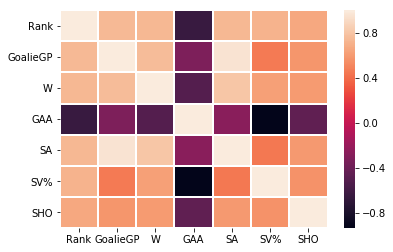

In [11]:
sns.heatmap(df_goalies.corr(), linewidths=1)

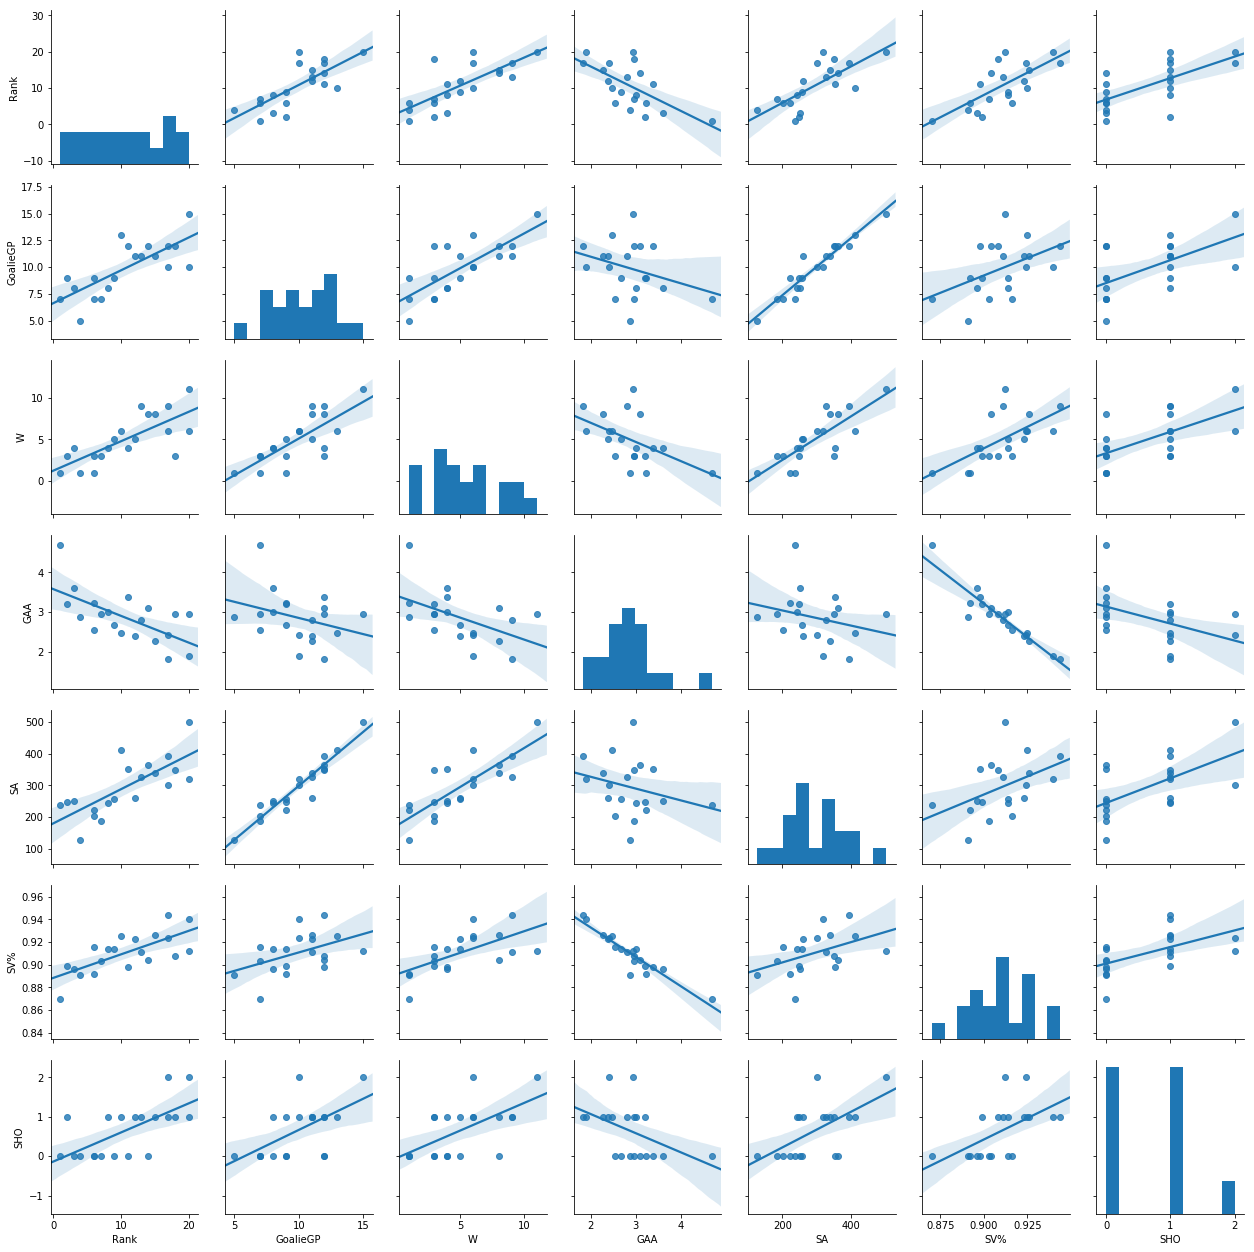

In [12]:
sns.pairplot(data=df_goalies,kind='reg')

### Goalie effects

After examining the tables and plots above we can come to a few conclusions:
1. All the goalie stats are positively corrolated, the most important however are Wins, Shots Against and Games Played (althought games played isn't a stat but tells us that it is indirectly corrolated with other stats)
2. Shot's Against has the strongest correlation with GamesPlayed - which is common sense and is nicely corroborated by the data - this indicates that I should try to increase the volume of games played for my Goalies.

My predicament when I joined the league was that I did not pick good goalies during the draft, so I am left with scraps, but based on the data above it turns out the most important factor (SA) in influencing rank can be manipulated easily despite my poor goalie selection during the draft. I can try to pick up goalies in free agency and cycle through them based on their upcoming schedule (add them before they are likely to play and drop them promptly after they play). It remains to be seen how wins & save % will shake out as the rest of the season goes. Might have to re-evaluate this strategy after a certain point and perhaps trade for a goalie that might have better win and save % stats.

In [13]:
df_players.describe()

,Rank,PlayerGP,G,A,+/-,PIM,PPP,SHP,SOG,FW,HIT,BLK
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,10.650000,113.700000,25.50000,42.500000,-1.900000,63.950000,21.200000,1.550000,250.950000,249.900000,124.200000,84.15000
std,6.002412,9.889388,4.54799,9.316087,16.280114,19.752348,5.606387,1.276302,34.656928,93.038702,30.064142,17.13499
min,1.000000,93.000000,16.00000,28.000000,-30.000000,28.000000,11.000000,0.000000,185.000000,49.000000,68.000000,56.00000
25%,6.000000,106.500000,22.00000,36.500000,-12.750000,53.000000,18.250000,0.750000,228.500000,205.000000,99.750000,72.25000
50%,10.500000,117.000000,25.50000,44.000000,-4.500000,60.500000,23.000000,1.500000,249.500000,242.000000,126.500000,83.00000
75%,15.500000,120.250000,29.25000,48.250000,10.500000,80.000000,24.500000,2.000000,280.250000,302.750000,145.250000,96.50000
max,20.000000,128.000000,34.00000,61.000000,22.000000,103.000000,28.000000,4.000000,300.000000,407.000000,167.000000,117.00000


In [14]:
df_players.median()

Rank         10.5
PlayerGP    117.0
G            25.5
A            44.0
+/-          -4.5
PIM          60.5
PPP          23.0
SHP           1.5
SOG         249.5
FW          242.0
HIT         126.5
BLK          83.0
dtype: float64

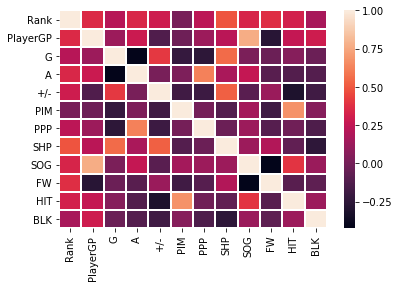

In [15]:
sns.heatmap(df_players.corr(), linewidths=1)

In [16]:
df_players_corr = df_players.corr()

In [17]:
df_players_corr.sort_values('Rank', ascending=False)

,Rank,PlayerGP,G,A,+/-,PIM,PPP,SHP,SOG,FW,HIT,BLK
Rank,1.000000,0.358117,0.218825,0.349660,0.300375,0.011830,0.236790,0.493621,0.338686,0.377384,0.318022,0.171965
SHP,0.493621,0.230594,0.557633,0.174846,0.526611,-0.105326,-0.030893,1.000000,0.132731,0.202600,-0.060627,-0.244634
FW,0.377384,-0.268084,-0.029976,-0.095456,0.123500,-0.179257,-0.100963,0.202600,-0.421210,1.000000,-0.096708,-0.076484
PlayerGP,0.358117,1.000000,0.131062,0.286779,-0.122720,-0.017864,0.130241,0.230594,0.768691,-0.268084,0.264507,0.296586
A,0.349660,0.286779,-0.412412,1.000000,0.016657,0.028745,0.624772,0.174846,0.264489,-0.095456,-0.113501,-0.106990
SOG,0.338686,0.768691,0.025211,0.264489,-0.088329,0.160377,0.131159,0.132731,1.000000,-0.421210,0.398562,0.127638
HIT,0.318022,0.264507,0.057739,-0.113501,-0.309092,0.679718,-0.015550,-0.060627,0.398562,-0.096708,1.000000,0.129079
+/-,0.300375,-0.122720,0.410152,0.016657,1.000000,-0.182312,-0.198019,0.526611,-0.088329,0.123500,-0.309092,-0.179105
PPP,0.236790,0.130241,-0.253892,0.624772,-0.198019,0.004373,1.000000,-0.030893,0.131159,-0.100963,-0.015550,-0.132366
G,0.218825,0.131062,1.000000,-0.412412,0.410152,-0.215897,-0.253892,0.557633,0.025211,-0.029976,0.057739,-0.032080


In [18]:
df_players_sorted_byPlayerGP = df_players.sort_values('PlayerGP', ascending=False)
df_players_sorted_byG = df_players.sort_values('G', ascending=False)
df_players_sorted_byA = df_players.sort_values('A', ascending=False)
df_players_sorted_byPM = df_players.sort_values('+/-', ascending=False)
df_players_sorted_byPIM = df_players.sort_values('PIM', ascending=False)
df_players_sorted_byPPP = df_players.sort_values('PPP', ascending=False)
df_players_sorted_bySHP = df_players.sort_values('SHP', ascending=False)
df_players_sorted_bySOG = df_players.sort_values('SOG', ascending=False)
df_players_sorted_byHIT = df_players.sort_values('HIT', ascending=False)
df_players_sorted_byBLK = df_players.sort_values('BLK', ascending=False)
df_players_sorted_byFW = df_players.sort_values('FW', ascending=False)

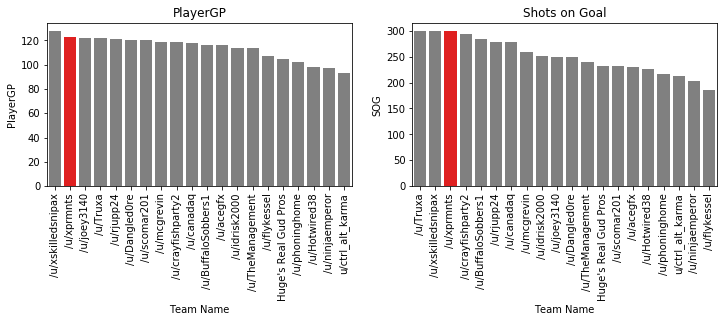

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byPlayerGP['Team Name']]
sns.barplot(x='Team Name', y='PlayerGP', data=df_players_sorted_byPlayerGP, palette=clrs, ax=ax1)
ax1.set_title('PlayerGP')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_bySOG['Team Name']]
sns.barplot(x='Team Name', y='SOG', data=df_players_sorted_bySOG, palette=clrs2, ax=ax2)
ax2.set_title('Shots on Goal')
for item in ax2.get_xticklabels():
    item.set_rotation(90)
    

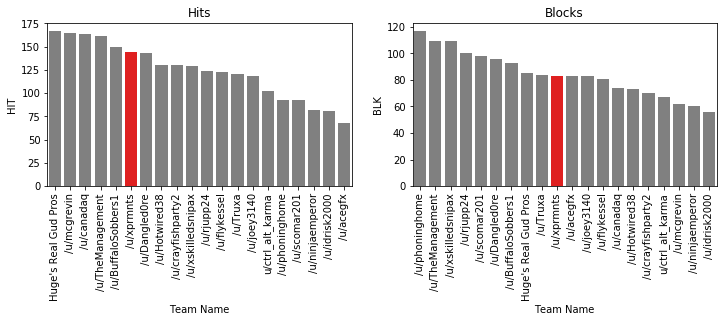

In [20]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byHIT['Team Name']]
sns.barplot(x='Team Name', y='HIT', data=df_players_sorted_byHIT, palette=clrs, ax=ax1)
ax1.set_title('Hits')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byBLK['Team Name']]
sns.barplot(x='Team Name', y='BLK', data=df_players_sorted_byBLK, palette=clrs2, ax=ax2)
ax2.set_title('Blocks')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

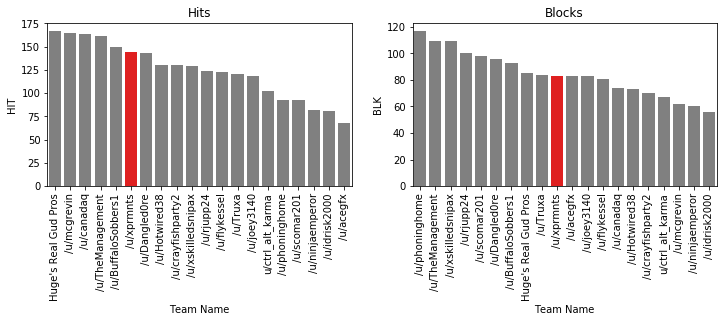

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byHIT['Team Name']]
sns.barplot(x='Team Name', y='HIT', data=df_players_sorted_byHIT, palette=clrs, ax=ax1)
ax1.set_title('Hits')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byBLK['Team Name']]
sns.barplot(x='Team Name', y='BLK', data=df_players_sorted_byBLK, palette=clrs2, ax=ax2)
ax2.set_title('Blocks')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

In [22]:
#df.corr().sort_values('Rank', ascending=False)

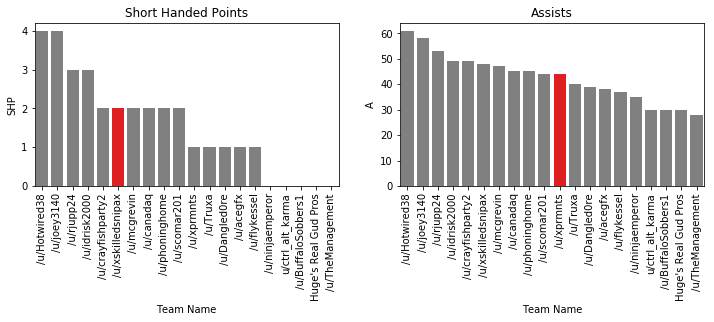

In [23]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), sharex=True)

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byHIT['Team Name']]
sns.barplot(x='Team Name', y='SHP', data=df_players_sorted_bySHP, palette=clrs, ax=ax1)
ax1.set_title('Short Handed Points')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byA['Team Name']]
sns.barplot(x='Team Name', y='A', data=df_players_sorted_byA, palette=clrs2, ax=ax2)
ax2.set_title('Assists')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

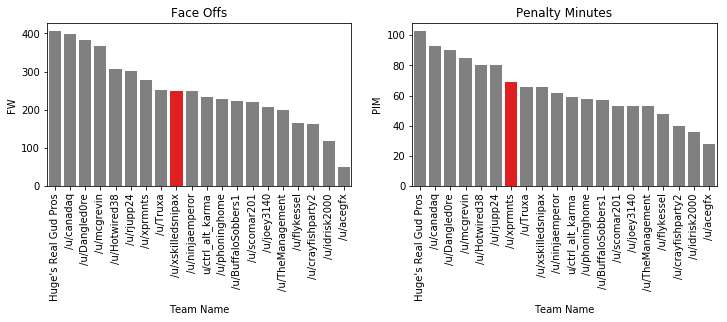

In [24]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), sharex=True)

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byFW['Team Name']]
sns.barplot(x='Team Name', y='FW', data=df_players_sorted_byFW, palette=clrs, ax=ax1)
ax1.set_title('Face Offs')
for item in ax1.get_xticklabels():
    item.set_rotation(90)

clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_players_sorted_byPIM['Team Name']]
sns.barplot(x='Team Name', y='PIM', data=df_players_sorted_byPIM, palette=clrs2, ax=ax2)
ax2.set_title('Penalty Minutes')
for item in ax2.get_xticklabels():
    item.set_rotation(90)